In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/presion_cardiaca.csv')

In [7]:
data.head()

,Fecha de medición,Zona horaria,SYS,DIA,Pulso,Nombre del modelo de dispositivo
0,2024-07-03 20:44,America/Mexico_City,126,79,111,HEM-7120_LA
1,2024-07-03 22:42,America/Mexico_City,122,79,92,HEM-7120_LA
2,2024-07-04 8:34,America/Mexico_City,113,74,87,HEM-7120_LA
3,2024-07-05 1:38,America/Mexico_City,113,78,83,HEM-7120_LA
4,2024-07-05 8:38,America/Mexico_City,120,78,88,HEM-7120_LA


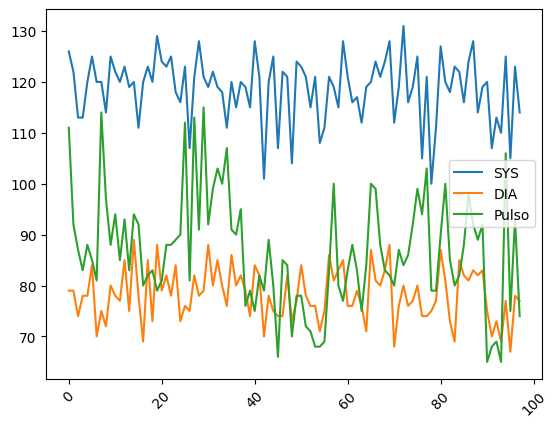

In [8]:
data.plot()
plt.xticks(rotation=45)
plt.show()

In [15]:
data.dtypes

,0
Fecha de medición,object
Zona horaria,object
SYS,int64
DIA,int64
Pulso,int64
Nombre del modelo de dispositivo,object


In [16]:
data['Fecha de medición'] = pd.to_datetime(data['Fecha de medición'])
data = data.set_index('Fecha de medición')

In [17]:
data_dia = data['DIA']
data_dia.isnull().sum()

0

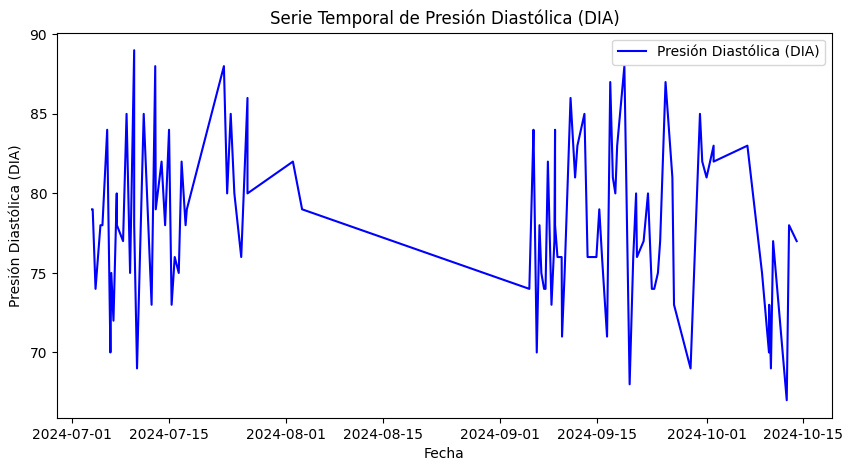

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(data_dia, label='Presión Diastólica (DIA)', color='blue')
plt.title('Serie Temporal de Presión Diastólica (DIA)')
plt.xlabel('Fecha')
plt.ylabel('Presión Diastólica (DIA)')
plt.legend()
plt.show()

In [19]:
resultado = adfuller(data_dia)
print(f"ADF Statistic: {resultado[0]}")
print(f"p-value: {resultado[1]}")
if resultado[1] <= 0.05:
    print("La serie es estacionaria")
else:
    print("La serie no es estacionaria")

ADF Statistic: -9.670690240251892
p-value: 1.2793208015680722e-16
La serie es estacionaria


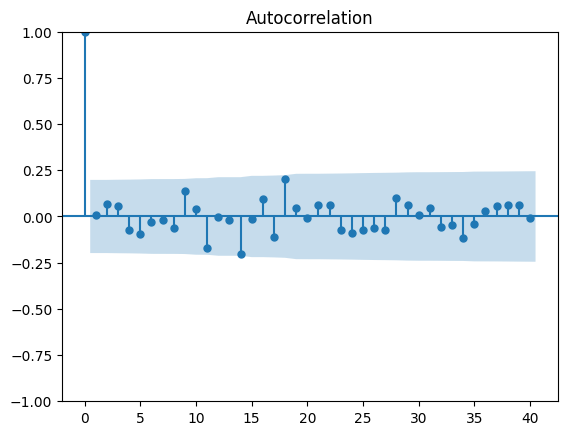

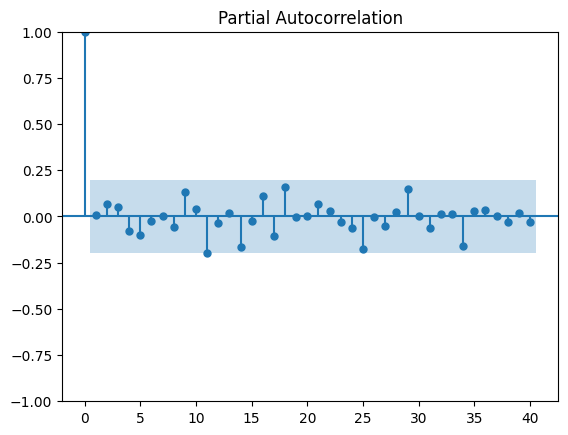

In [20]:
plot_acf(data['DIA'], lags= 40)
plt.show()
plot_pacf(data['DIA'], lags=40)
plt.show()

In [21]:
p,d,q = 1,1,1

model = ARIMA(data['DIA'], order=(p,d,q))
model_fit = model.fit()
model_summary = model_fit.summary()
print(model_summary)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    DIA   No. Observations:                   98
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -297.307
Date:                Fri, 13 Dec 2024   AIC                            600.615
Time:                        23:50:46   BIC                            608.339
Sample:                             0   HQIC                           603.738
                                 - 98                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0152      0.136      0.112      0.911      -0.251       0.282
ma.L1         -0.9874      0.111     -8.858      0.000      -1.206      -0.769
sigma2        25.9282      4.526      5.728      0.0

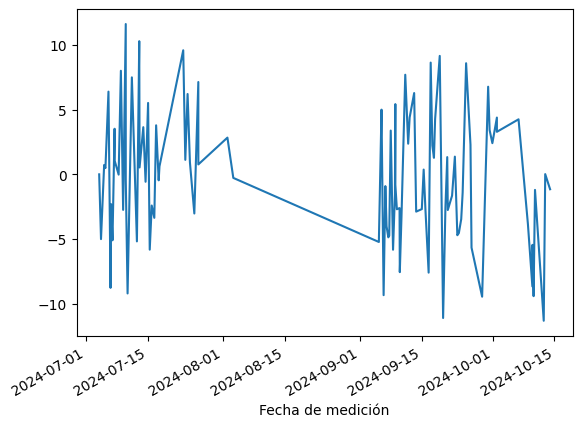

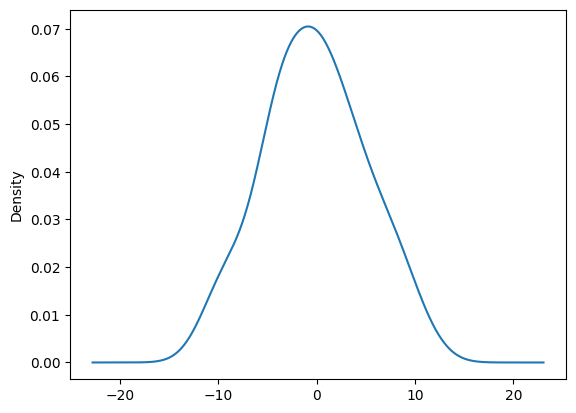

In [22]:
residuals = model_fit.resid[1:]
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [23]:
print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")

AIC: 600.6145250192159
BIC: 608.338657954726


In [24]:
train_size = int(len(data_dia) * 0.8)
train, test = data_dia[:train_size], data_dia[train_size:]

# Ajustar el modelo ARIMA. Reemplaza p, d, q con tus parámetros determinados (ej: (1, 1, 1))
p, d, q = 1, 0, 1  # Configura estos valores según tus análisis
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Realizar el pronóstico para el tamaño del conjunto de prueba
forecast = model_fit.forecast(steps=len(test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

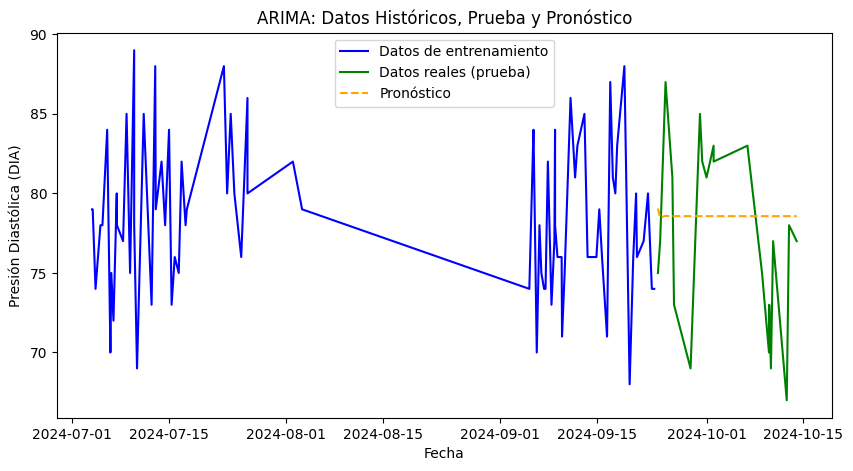

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(train, label='Datos de entrenamiento', color='blue')
plt.plot(test, label='Datos reales (prueba)', color='green')
plt.plot(test.index, forecast, label='Pronóstico', color='orange', linestyle='--')
plt.title('ARIMA: Datos Históricos, Prueba y Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Presión Diastólica (DIA)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

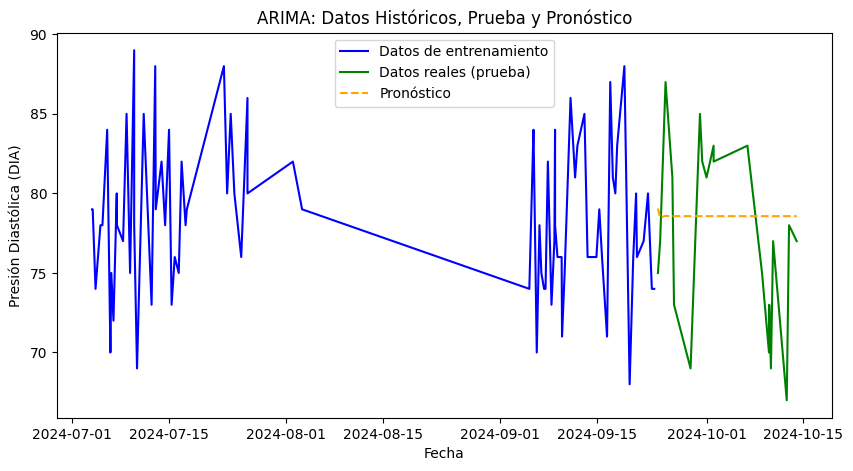

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 5.813006278823111
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.6 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=489.802, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=456.429, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=469.517, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=443.542, Time=0.30 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.38 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=466.117, Time=0.19 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=436.271, Time=0.40 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=449.021, Time=0.17 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=5.57 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.28 sec
 ARIMA(3,1,0)(2,1,0)[1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

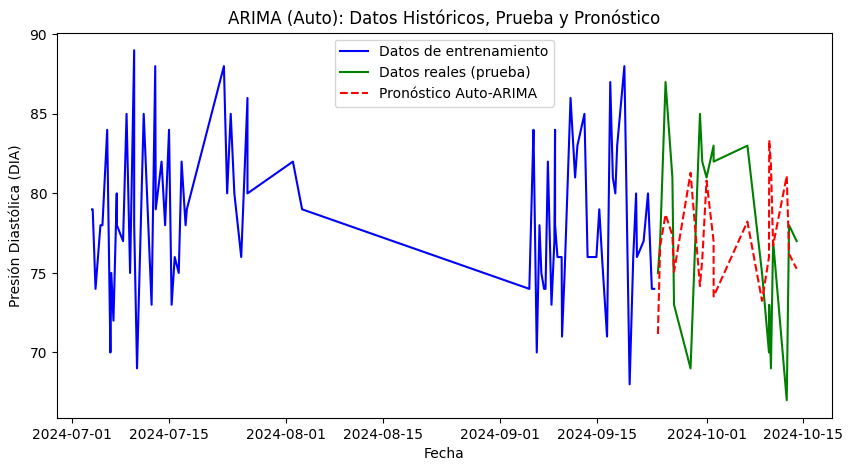

RMSE (Auto-ARIMA): 7.260360931808947


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:

# Ajustar el modelo ARIMA.
# Experimentar con diferentes valores de p, d, q para mejorar el pronóstico.
# Considera usar auto_arima para encontrar los mejores parámetros automáticamente.
p, d, q = 1, 0, 1  # Configura estos valores según tus análisis
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Realizar el pronóstico para el tamaño del conjunto de prueba
forecast = model_fit.predict(start=len(train), end=len(data_dia)-1) # Corregido para predecir sobre el conjunto de prueba

plt.figure(figsize=(10, 5))
plt.plot(train, label='Datos de entrenamiento', color='blue')
plt.plot(test, label='Datos reales (prueba)', color='green')
plt.plot(test.index, forecast, label='Pronóstico', color='orange', linestyle='--') # Usamos el índice de test para la gráfica
plt.title('ARIMA: Datos Históricos, Prueba y Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Presión Diastólica (DIA)')
plt.legend()
plt.show()

# Evaluar el modelo
rmse = mean_squared_error(test, forecast, squared=False)
print(f"RMSE: {rmse}")

# --- Intenta mejorar el modelo con auto_arima ---
# Instala la biblioteca pmdarima
!pip install pmdarima

from pmdarima import auto_arima

# Encuentra los mejores parámetros p, d, q automáticamente
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(stepwise_model.summary())

# Ajusta el modelo con los mejores parámetros
model_auto = ARIMA(train, order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order)
model_fit_auto = model_auto.fit()
forecast_auto = model_fit_auto.predict(start=len(train), end=len(data_dia)-1)

plt.figure(figsize=(10, 5))
plt.plot(train, label='Datos de entrenamiento', color='blue')
plt.plot(test, label='Datos reales (prueba)', color='green')
plt.plot(test.index, forecast_auto, label='Pronóstico Auto-ARIMA', color='red', linestyle='--') # Usamos el índice de test para la gráfica
plt.title('ARIMA (Auto): Datos Históricos, Prueba y Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Presión Diastólica (DIA)')
plt.legend()
plt.show()

rmse_auto = mean_squared_error(test, forecast_auto, squared=False)
print(f"RMSE (Auto-ARIMA): {rmse_auto}")

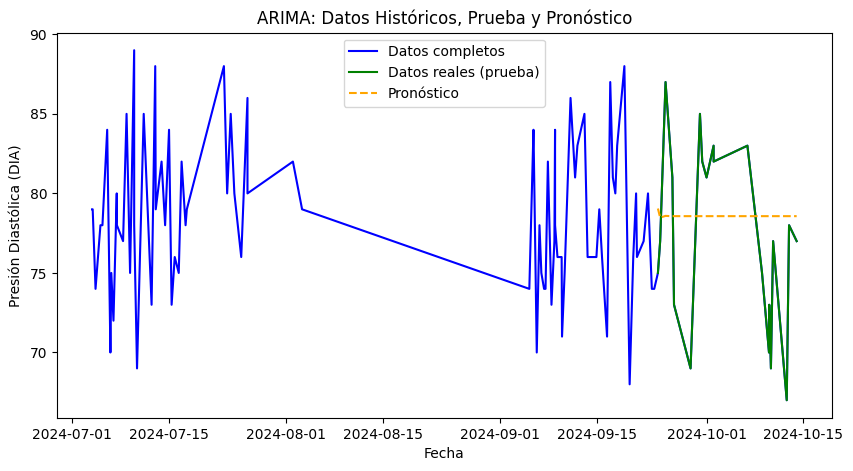

In [ ]:
all_data = pd.concat([train, test])  # Combinar entrenamiento y prueba
forecast_index = test.index  # Usar el índice del conjunto de prueba para el pronóstico

# Graficar los datos históricos, de prueba y el pronóstico
plt.figure(figsize=(10, 5))
plt.plot(all_data, label='Datos completos', color='blue')  # Toda la serie
plt.plot(test.index, test, label='Datos reales (prueba)', color='green')  # Resaltar la prueba
plt.plot(forecast_index, forecast, label='Pronóstico', color='orange', linestyle='--')  # Pronóstico
plt.title('ARIMA: Datos Históricos, Prueba y Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Presión Diastólica (DIA)')
plt.legend()
plt.show()

# Pronostico con Intervalos de Confianza


In [ ]:
forecast_steps = len(test)
forecast_results = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_results.predicted_mean
confidence_intervals = forecast_results.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


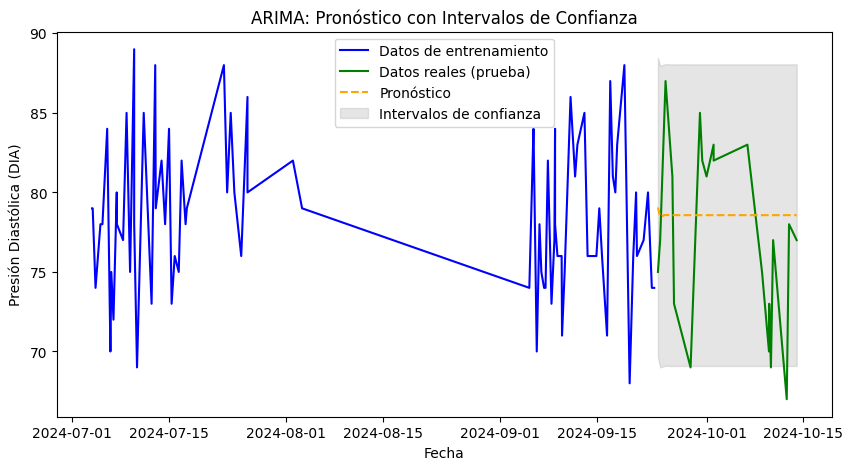

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train, label='Datos de entrenamiento', color='blue')
plt.plot(test.index, test, label='Datos reales (prueba)', color='green')
plt.plot(test.index, forecast, label='Pronóstico', color='orange', linestyle='--')
plt.fill_between(
    test.index,
    confidence_intervals.iloc[:, 0],  # Límite inferior
    confidence_intervals.iloc[:, 1],  # Límite superior
    color='gray', alpha=0.2,
    label='Intervalos de confianza'
)
plt.title('ARIMA: Pronóstico con Intervalos de Confianza')
plt.xlabel('Fecha')
plt.ylabel('Presión Diastólica (DIA)')
plt.legend()
plt.show()

Pronostico para diciembre

In [ ]:
#Fechas de diciembre

import datetime
start_date = datetime.date(2024, 10, 15)
end_date = datetime.date(2024, 10, 30)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

In [ ]:
forecast_steps = len(date_range)
forecast_results = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_results.predicted_mean
confidence_intervals = forecast_results.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


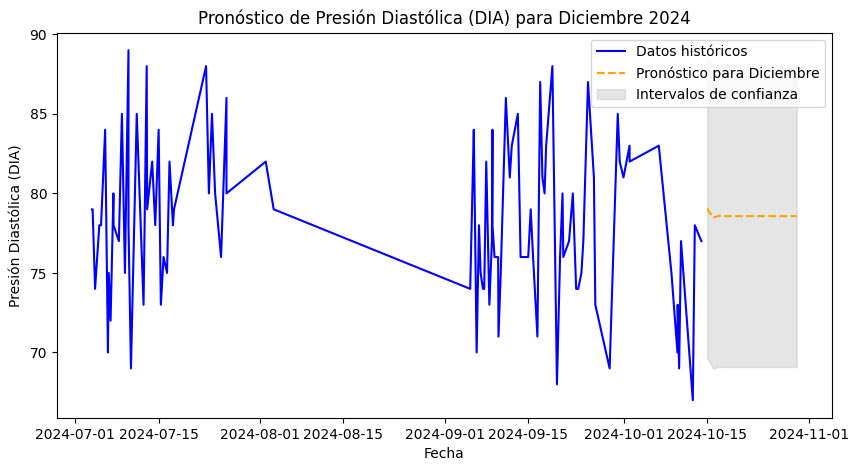

,Pronóstico,Límite Inferior,Límite Superior
Fecha,,,
2024-10-15,79.048606,69.631616,88.465596
2024-10-16,78.478234,69.000446,87.956022
2024-10-17,78.587284,69.107281,88.067288
2024-10-18,78.566435,69.086351,88.046519
2024-10-19,78.570421,69.090334,88.050508
2024-10-20,78.569659,69.089572,88.049746
2024-10-21,78.569805,69.089717,88.049892
2024-10-22,78.569777,69.089689,88.049864
2024-10-23,78.569782,69.089695,88.049870


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data_dia, label='Datos históricos', color='blue')
plt.plot(date_range, forecast, label='Pronóstico para Diciembre', color='orange', linestyle='--')
plt.fill_between(
    date_range,
    confidence_intervals.iloc[:, 0],  # Límite inferior
    confidence_intervals.iloc[:, 1],  # Límite superior
    color='gray', alpha=0.2,
    label='Intervalos de confianza'
)
plt.title('Pronóstico de Presión Diastólica (DIA) para Diciembre 2024')
plt.xlabel('Fecha')
plt.ylabel('Presión Diastólica (DIA)')
plt.legend()
plt.show()

# Mostrar el pronóstico para cada día
forecast_df = pd.DataFrame({
    'Fecha': date_range,
    'Pronóstico': forecast.values,
    'Límite Inferior': confidence_intervals.iloc[:, 0].values,
    'Límite Superior': confidence_intervals.iloc[:, 1].values
})
forecast_df.set_index('Fecha', inplace=True)
forecast_df

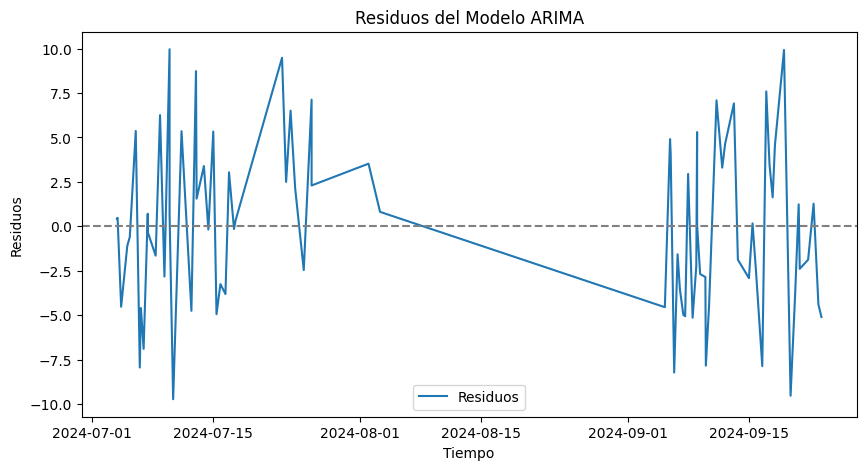

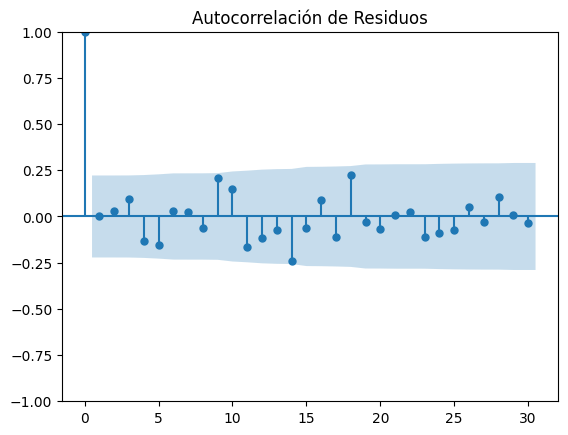

In [ ]:
import statsmodels.api as sm

# Graficar los residuos
residuals = model_fit.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals, label="Residuos")
plt.axhline(y=0, linestyle='--', color='gray')
plt.title("Residuos del Modelo ARIMA")
plt.xlabel("Tiempo")
plt.ylabel("Residuos")
plt.legend()
plt.show()

# Verificar autocorrelación en los residuos
sm.graphics.tsa.plot_acf(residuals, lags=30)
plt.title("Autocorrelación de Residuos")
plt.show()

Aunque los residuos fluctúan alrededor de 0, aún se observan valores elevados y ciertos patrones, lo que sugiere que el modelo no logra capturar completamente la variabilidad de los datos.

Implemnentacion ARIMA con Pulso y presion SYS

In [ ]:
variables = ['SYS', 'Pulso']

In [ ]:
results={}

Analizando ACF y PACF para SYS


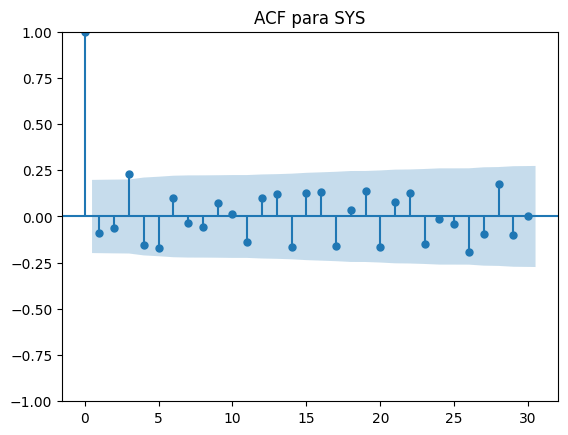

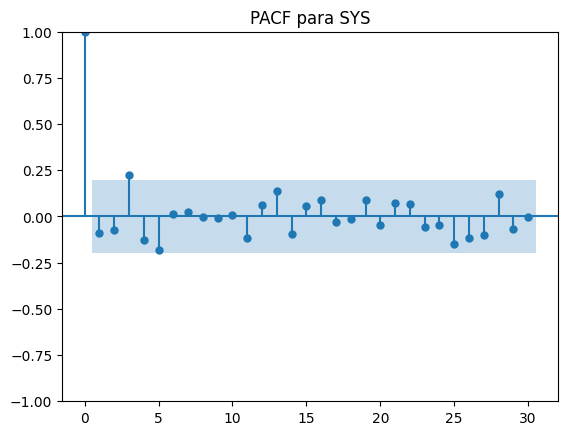

Analizando ACF y PACF para Pulso


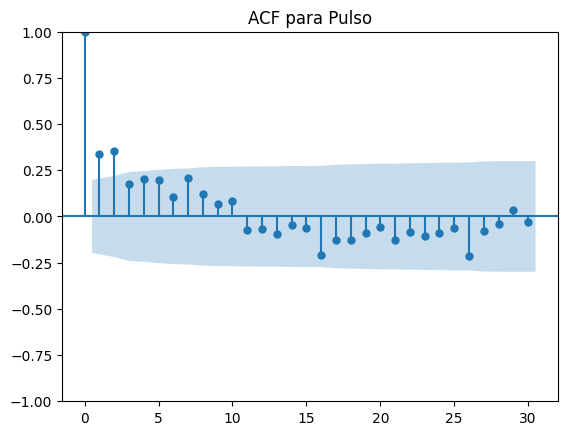

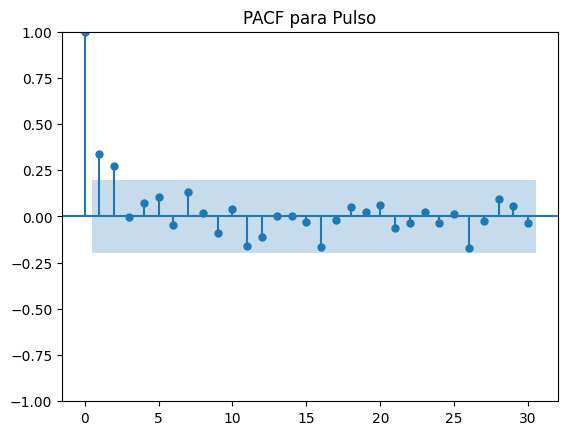

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for var in variables:
    print(f"Analizando ACF y PACF para {var}")
    plot_acf(data[var], lags=30)
    plt.title(f"ACF para {var}")
    plt.show()

    plot_pacf(data[var], lags=30)
    plt.title(f"PACF para {var}")
    plt.show()

Procesando variable: SYS


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

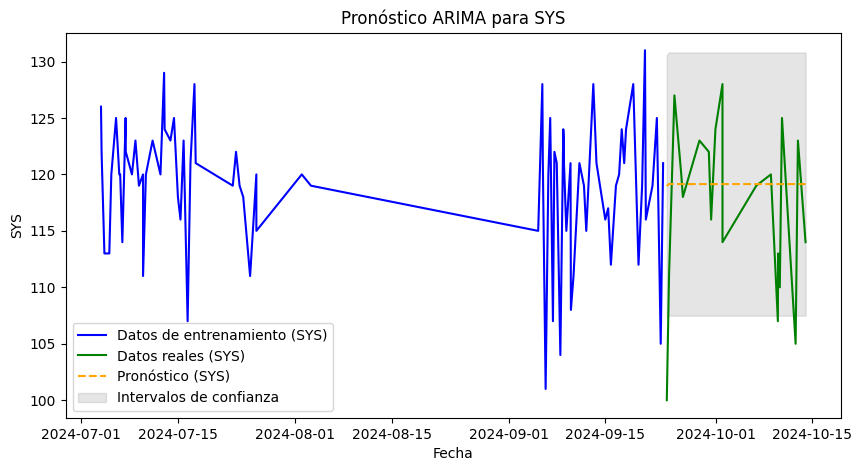

Procesando variable: Pulso


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

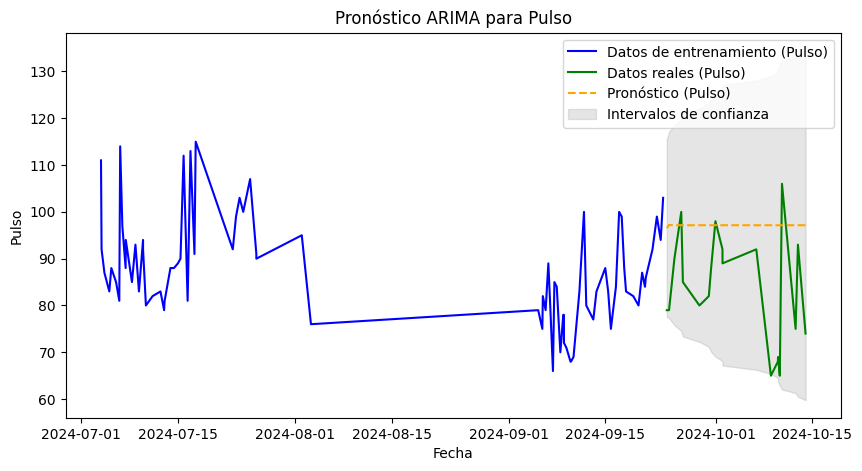

In [ ]:
for var in variables:
    print(f"Procesando variable: {var}")

    # Seleccionar la columna de interés
    data_var = data[var]

    # Dividir los datos en entrenamiento y prueba (80%-20%)
    train_size = int(len(data_var) * 0.8)
    train, test = data_var[:train_size], data_var[train_size:]

    # Determinar parámetros (ajusta según ACF y PACF)
    p, d, q = 1, 1, 1  # Ajusta estos valores según tu análisis

    # Ajustar el modelo ARIMA
    model = ARIMA(train, order=(p, d, q))
    model_fit = model.fit()

    # Pronosticar el tamaño del conjunto de prueba
    forecast_results = model_fit.get_forecast(steps=len(test))
    forecast = forecast_results.predicted_mean
    confidence_intervals = forecast_results.conf_int()

    # Guardar resultados
    results[var] = {
        "train": train,
        "test": test,
        "forecast": forecast,
        "confidence_intervals": confidence_intervals,
        "model_fit": model_fit
    }

    # Graficar resultados
    plt.figure(figsize=(10, 5))
    plt.plot(train, label=f'Datos de entrenamiento ({var})', color='blue')
    plt.plot(test.index, test, label=f'Datos reales ({var})', color='green')
    plt.plot(test.index, forecast, label=f'Pronóstico ({var})', color='orange', linestyle='--')
    plt.fill_between(
        test.index,
        confidence_intervals.iloc[:, 0],  # Límite inferior
        confidence_intervals.iloc[:, 1],  # Límite superior
        color='gray', alpha=0.2, label='Intervalos de confianza'
    )
    plt.title(f'Pronóstico ARIMA para {var}')
    plt.xlabel('Fecha')
    plt.ylabel(var)
    plt.legend()
    plt.show()

Implementacion NN

In [9]:
#Bibliotecas necesarias
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.2457 - val_loss: 0.2749
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1844 - val_loss: 0.2335
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1882 - val_loss: 0.1950
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1181 - val_loss: 0.1575
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1098 - val_loss: 0.1202
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0807 - val_loss: 0.0844
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0446 - val_loss: 0.0553
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0371 - val_loss: 0.0445
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0443 - val_loss: 0.0441
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0417 - val_loss: 0.0454
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0390 - val_loss: 0.0506
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0422 - val_l

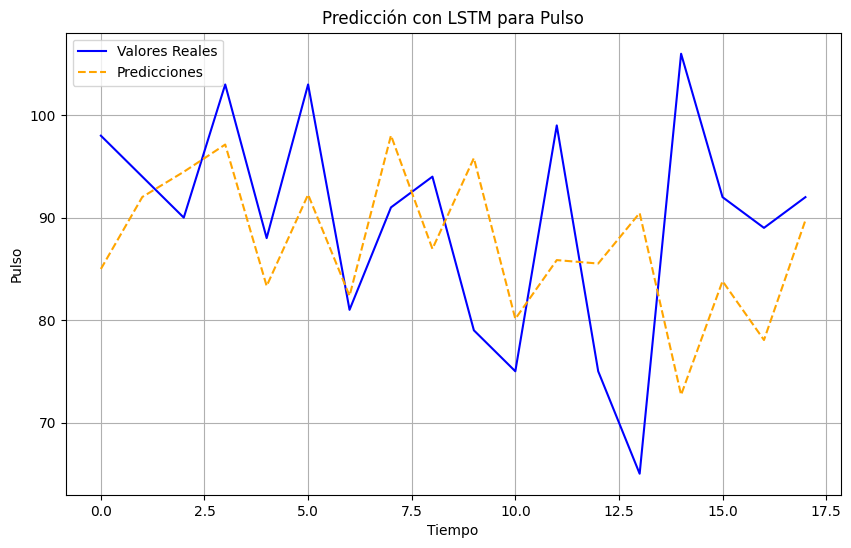

In [14]:

# Seleccionar las columnas de interés
columns = ["Pulso"]
data_selected = data[columns]

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_selected)

# Crear secuencias de entrada (X) y salida (y)
def create_sequences_multivariate(data, seq_length, target_index):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # Todas las columnas como entrada
        y.append(data[i+seq_length, target_index])  # Solo la columna objetivo
    return np.array(X), np.array(y)

# Configuración
seq_length = 10  # Número de pasos de tiempo
target_index = 0  # Índice de la columna objetivo (0 para Pulso, 1 para SYS, 2 para DIA)

# Crear secuencias
X, y = create_sequences_multivariate(data_scaled, seq_length, target_index)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(seq_length, len(columns))),
    tf.keras.layers.Dense(1)  # Salida con un solo valor (variable objetivo)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Hacer predicciones
y_pred = model.predict(X_test)

# Desnormalizar las predicciones y los valores reales
y_pred_rescaled = scaler.inverse_transform(
    np.hstack([y_pred, np.zeros((len(y_pred), len(columns)-1))])
)[:, 0]  # Solo columna objetivo
y_test_rescaled = scaler.inverse_transform(
    np.hstack([y_test.reshape(-1, 1), np.zeros((len(y_test), len(columns)-1))])
)[:, 0]

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Valores Reales", color="blue")
plt.plot(y_pred_rescaled, label="Predicciones", color="orange", linestyle="--")
plt.title(f"Predicción con LSTM para {columns[target_index]}")
plt.xlabel("Tiempo")
plt.ylabel(columns[target_index])
plt.legend()
plt.grid()
plt.show()